# Linear Regression

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df=pd.DataFrame({
    "Study_Hours":[1,2,3,4,5],
    "Marks":[2,4,5,4,5]
})
df

,Study_Hours,Marks
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [4]:
X=df[["Study_Hours"]]
Y=df["Marks"]

In [5]:
model=LinearRegression()
model.fit(X,Y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
X_line = pd.DataFrame(
    {'Study_Hours' : np.linspace(X.min()[0], X.max()[0], 100)}
)
Y_line=model.predict(X_line)

C:\Users\kk397_ymf0gi0\AppData\Local\Temp\ipykernel_8272\245807639.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  {'Study_Hours' : np.linspace(X.min()[0], X.max()[0], 100)}


In [8]:
X_line

,Study_Hours
0,1.000000
1,1.040404
2,1.080808
3,1.121212
4,1.161616
...,...
95,4.838384
96,4.878788
97,4.919192
98,4.959596


In [9]:
print("Slope (m)", model.coef_[0])
print("Intercept (b):",model.intercept_)

Slope (m) 0.6
Intercept (b): 2.2


In [13]:
X_new=pd.DataFrame({'Study_Hours':[4.0]})
Y_new=model.predict(X_new)
print("Predict Value: ",Y_new)

Predict Value:  [4.6]


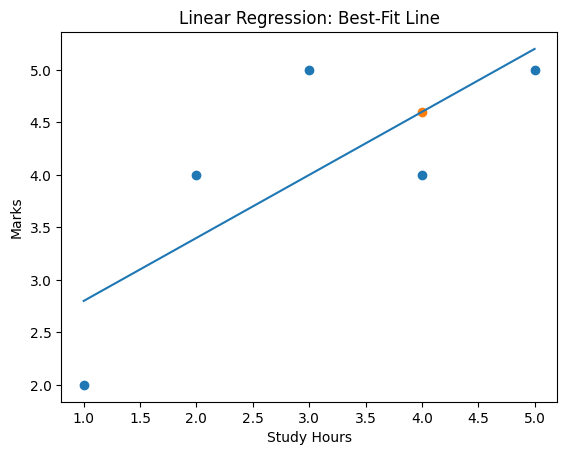

In [14]:
plt.figure()
plt.scatter(X,Y)
plt.plot(X_line, Y_line)
plt.scatter(X_new,Y_new)
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Linear Regression: Best-Fit Line")
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error

Y_pred = model.predict(X)
mse = mean_squared_error(Y,Y_pred)

In [17]:
print("MSE:", mse)

MSE: 0.47999999999999987


# Multiple Linear Regression

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
df = pd.read_csv('MLR_Study_marks.csv')
df

,Study_Hours,Attendance,Sleep_Hours,Marks
0,2,60,5,48
1,3,62,5,50
2,4,65,6,55
3,5,68,6,58
4,6,70,6,60
...,...,...,...,...
72,6,79,6,68
73,7,82,7,71
74,8,85,7,75
75,9,88,7,78


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Study_Hours  77 non-null     int64
 1   Attendance   77 non-null     int64
 2   Sleep_Hours  77 non-null     int64
 3   Marks        77 non-null     int64
dtypes: int64(4)
memory usage: 2.5 KB


In [24]:
df.describe()

,Study_Hours,Attendance,Sleep_Hours,Marks
count,77.000000,77.000000,77.000000,77.000000
mean,6.207792,75.467532,6.389610,64.870130
std,2.493875,8.305966,0.780618,8.829303
min,2.000000,60.000000,5.000000,48.000000
25%,4.000000,69.000000,6.000000,59.000000
50%,6.000000,75.000000,6.000000,65.000000
75%,8.000000,81.000000,7.000000,72.000000
max,10.000000,96.000000,8.000000,84.000000


In [25]:
X = df[["Study_Hours", "Attendance", "Sleep_Hours"]]
y = df["Marks"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 40)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Intercept:", model.intercept_)
print("Model Coefficients:", model.coef_)


Model Intercept: -0.6066101740192664
Model Coefficients: [0.9420473  0.74064362 0.57973332]


In [29]:
y_pred = model.predict(X_test)

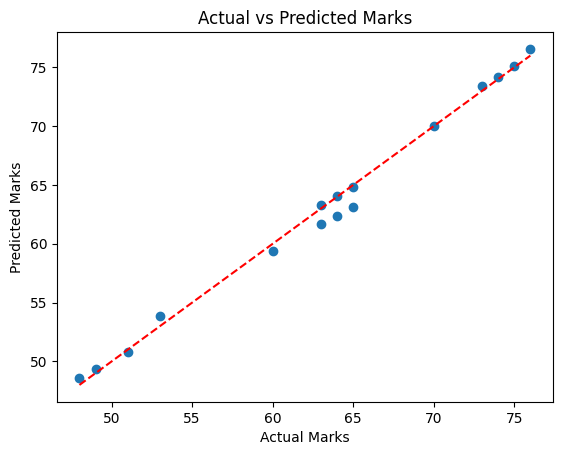

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Marks")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [33]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.6339347099085453
R^2 Score: 0.991984625587169


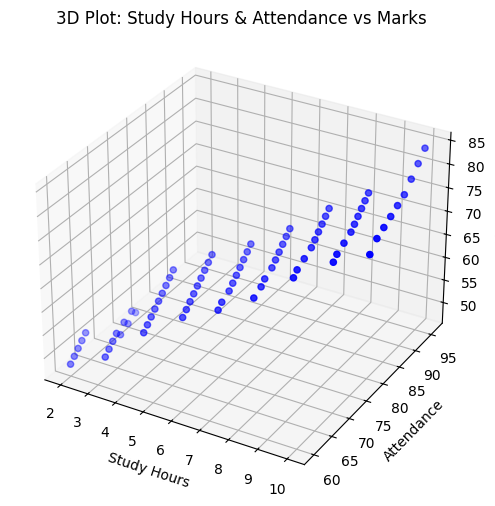

In [35]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Study_Hours"], df["Attendance"], df["Marks"], c='b', marker='o')
ax.set_xlabel("Study Hours")
ax.set_ylabel("Attendance")
ax.set_zlabel("Marks")
ax.set_title("3D Plot: Study Hours & Attendance vs Marks")
plt.show()